<a href="https://colab.research.google.com/github/FabriDeCastelli/ML-Regression-Assignment/blob/main/deliverable/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
Student: Fabrizio De Castelli

--- 
# IMPORTANT: all the submitted code should be in 2 cells
1) How you trained, evaluated and saved your model
2) How to load your model from a file, load the data and evaluate the model. Cell 2) should be running independently (even if cell 1 is not run)

-------- T1 ---------
theta_hat = [ 1.30713096 -0.0514791  -0.57549745  0.41501246  0.03720061]
MSE on training set: 0.6923048625250405
MSE on test set: 0.7964961207745369
-------- T2 ---------
MSE on training set: 0.01931342920936631
MSE on test set: 0.1050697159338608
-------- T3 ---------
7/7 [==============================] - 0s 2ms/step - loss: 0.0226
MSE on test set: 0.02259691059589386


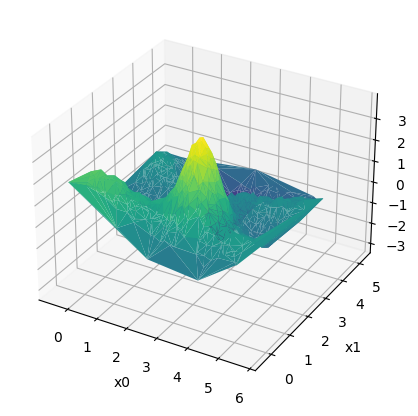

In [4]:
# Import libraries
import io
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

# Load data 
url = 'https://drive.switch.ch/index.php/s/TeDwnbYsBKRuJjv/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# Alternatively yo can load the data from file
# data_path = '../data/data.npz' # path to the .npz file storing the data
# data = np.load(data_path)

# x is a Numpy array of shape (n_samples, n_features) with the inputs
x = data.f.x

# y is a Numpy array of shape (n_samples, ) with the targets
y = data.f.y


# T1
print('-------- T1 ---------')

from sklearn.model_selection import train_test_split 

# Merge inputs and target into a (3,1) shaped numpy array
data = np.hstack((x, y.reshape(y.shape[0],1)))

# Generate training and test set
train, test = train_test_split(data, train_size=0.8, shuffle=True, random_state=0)


# Split inputs and targets for training set
x_train = train[:, 0:2]
y_train = train[:, -1]

# Split inputs and targets for test set
x_test = test[:, 0:2]
y_test = test[:, -1]

# Plot data into the space 

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(x_train[:, 0], x_train[:, 1], y_train, cmap='viridis')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
# plt.tight_layout()


# Library for Linear Regression
from sklearn.linear_model import LinearRegression

# Init the model
lr = LinearRegression(fit_intercept=False)  

# Create training matrix to match the linear function
ones_vector_train = np.ones(shape=(x_train.shape[0], 1))
sinx2_vector_train = np.sin(x_train[:, 1]).reshape(train.shape[0], 1)
x1_times_x2_vector_train = np.multiply(x_train[:, 0], x_train[:, 1]).reshape(train.shape[0], 1)
X_train = np.hstack((ones_vector_train, x_train, sinx2_vector_train, x1_times_x2_vector_train)) 

# Create test matrix to match the linear function
ones_vector_test = np.ones(shape=(x_test.shape[0], 1))
sinx2_vector_test = np.sin(x_test[:, 1]).reshape(test.shape[0], 1)
x1_times_x2_vector_test = np.multiply(x_test[:, 0], x_test[:, 1]).reshape(test.shape[0], 1)
X_test = np.hstack((ones_vector_test, x_test, sinx2_vector_test, x1_times_x2_vector_test)) 

# Estimate parameters on the training set
lr.fit(X_train, y_train)
theta_hat = lr.coef_

# Library for mean squared error
from sklearn.metrics import mean_squared_error 

# Generate prediction on training set and evaluate performance with MSE
train_prediction = lr.predict(X_train)
train_performance = mean_squared_error(train_prediction, y_train)

# Generate prediction on test set and evaluate performance with MSE
test_prediction = lr.predict(X_test)
test_performance = mean_squared_error(test_prediction, y_test)

print('theta_hat = {}'.format(theta_hat))

# print('Training performance with theta hat: {}'. format(train_performance_theta_hat))
# print('Test performance with theta hat: {}'. format(test_performance_theta_hat))

print('MSE on training set: {}'.format(train_performance))
print('MSE on test set: {}'.format(test_performance))

# T2
print('-------- T2 ---------')

from sklearn.preprocessing import PolynomialFeatures

degree = 11
pol_feat = PolynomialFeatures(degree=degree, include_bias=False) 

Xpol_train = pol_feat.fit_transform(x_train)
Xpol_test = pol_feat.fit_transform(x_test)

lr = LinearRegression(fit_intercept = True)
lr.fit(Xpol_train, y_train)

train_prediction = lr.predict(Xpol_train)
train_performance = mean_squared_error(train_prediction, y_train)

test_prediction = lr.predict(Xpol_test)
test_performance = mean_squared_error(test_prediction, y_test)

print('MSE on training set: {}'.format(train_performance))
print('MSE on test set: {}'.format(test_performance))

# T3 (Bonus)

print('-------- T3 ---------')

def baseline_model():
  network = Sequential()
  network.add(Dense(11, activation="relu"))
  network.add(Dense(5, activation="tanh"))
  network.add(Dense(1))
  network.compile(optimizer="sgd", loss="mean_squared_error")
  return network

from keras import Input, Model
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from tensorflow import keras
from keras.callbacks import EarlyStopping
import tensorflow as tf

network = baseline_model()

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

# Assuming your X_test array has shape (600, 5)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)



history = network.fit(X_train, y_train, 
                      epochs = 1000, verbose = 0, 
                      #callbacks = [early_stopping], validation_data=(X_val, y_val)
                      )

eval_results = network.evaluate(X_test, y_test)

print('MSE on test set: {}'.format(eval_results))










# Example on how to use baseline model:

In [ ]:
# Import libraries
import joblib
import io
import requests
import numpy as np

def evaluate_predictions(y_true, y_pred):
    """
    Evaluates the mean squared error between the values in y_true and the values
    in y_pred.
    ### YOU CAN NOT EDIT THIS FUNCTION ###
    :param y_true: Numpy array, the true target values from the test set;
    :param y_pred: Numpy array, the values predicted by your model.
    :return: float, the mean squared error between the two arrays.
    """
    assert y_true.shape == y_pred.shape
    return ((y_true - y_pred) ** 2).mean()


def load_model(filename):
    """
    Loads a Scikit-learn model saved with joblib.dump.
    This is just an example, you can write your own function to load the model.
    Some examples can be found in src/utils.py.
    :param filename: string, path to the file storing the model.
    :return: the model.
    """
    model = joblib.load(filename)

    return model

# Load the data
# This will be replaced with our private test data when grading the assignment

# Load data from url
url = 'https://drive.switch.ch/index.php/s/TeDwnbYsBKRuJjv/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# Alternatively yo can load the data from file
# data_path = '../data/data.npz'
# data = np.load(data_path)

# x is a Numpy array of shape (n_samples, n_features) with the inputs
x = data.f.x
# y is a Numpy array of shape (n_samples, ) with the targets
y = data.f.y

# Load the trained model
baseline_model_path = './baseline_model.pickle'
baseline_model = load_model(baseline_model_path)

# Change input
x = ...

# Predict on the given samples
y_pred = baseline_model.predict(x)

############################################################################
# STOP EDITABLE SECTION: do not modify anything below this point.
############################################################################

# Evaluate the prediction using MSE
mse = evaluate_predictions(y_pred, y)
print(f'MSE on whole dataset: {mse}')

# NOTE: NOW THIS CELL IS NOT WORKING SINCE YOU NEED TO CHANGE THE INPUT.
# DO IT AND EVERYTHING RUNS SMOOTH
